<a href="https://colab.research.google.com/github/JonatasLemos/DataAnalysisProjects/blob/main/packageAnalysis/PackagesAnalyticsPartTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing conclusions from analytics values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_packages = pd.read_csv("/content/drive/MyDrive/Colab Data/packages.csv")
df_packages = df_packages.rename(columns=
          {"name":"package name","desc": "package description", "last_30_d": "installs last 30 days",
          "last_year":"installs last year"})
df_packages = df_packages.drop(["build_error","last_90_d"],axis=1)
len_col = len(df_packages["installs last year"])

## Preparing DFs to plot


1.   DF showing packages with most installs last year
2.   DF showing packages with most installs last month
3.   DF showing packages with the biggest changes in position
4.   DF showing last_month/last_year ratio





In [ ]:
df_packages.sort_values(by="installs last year",ascending=False,inplace=True)
df_most_last_year = df_packages.head(7).copy()
df_packages["position year"] = np.arange(1,len_col+1)
df_packages.head()

,package name,package description,installs last 30 days,installs last year,position year
3655,openssl@1.1,Cryptography and SSL/TLS Toolkit,688868,8238647,1
4177,readline,Library for command-line editing,605013,6047926,2
4617,sqlite,Command-line interface for SQLite,477451,5725333,3
4068,python@3.8,"Interpreted, interactive, object-oriented prog...",259063,4665602,4
2124,icu4c,C/C++ and Java libraries for Unicode and globa...,288292,4549268,5


In [ ]:
df_packages["last 30 days/last year"] = round((df_packages["installs last 30 days"]/df_packages["installs last year"])*100,2)


In [ ]:
df_packages.sort_values(by="installs last 30 days",ascending=False,inplace=True)
df_most_last_30d = df_packages.head(7).copy()
df_packages["position month"] = np.arange(1,len_col+1)
df_packages["change in position"] = df_packages["position year"]-df_packages["position month"]
df_packages.head()

,package name,package description,installs last 30 days,installs last year,position year,last 30 days/last year,position month,change in position
4069,python@3.9,"Interpreted, interactive, object-oriented prog...",734572,3129188,11,23.47,1,10
3655,openssl@1.1,Cryptography and SSL/TLS Toolkit,688868,8238647,1,8.36,2,-1
4781,tcl-tk,Tool Command Language,638433,877834,88,72.73,3,85
4177,readline,Library for command-line editing,605013,6047926,2,10.00,4,-2
4617,sqlite,Command-line interface for SQLite,477451,5725333,3,8.34,5,-2


In [ ]:
df_packages.sort_values(by="installs last 30 days",ascending=False,inplace=True)
major_changes = df_packages.head(7).copy()
major_changes.sort_values(by="change in position",inplace=True,ascending=False)
major_changes[["package name","package description","change in position"]].head()

,package name,package description,change in position
4781,tcl-tk,Tool Command Language,85
4069,python@3.9,"Interpreted, interactive, object-oriented prog...",10
2614,libffi,Portable Foreign Function Interface library,6
1706,glib,Core application library for C,1
3655,openssl@1.1,Cryptography and SSL/TLS Toolkit,-1


In [ ]:
df_largest_proportions = major_changes.head(7).copy()
df_largest_proportions[["package name","last 30 days/last year","change in position"]].head()

,package name,last 30 days/last year,change in position
4781,tcl-tk,72.73,85
4069,python@3.9,23.47,10
2614,libffi,14.47,6
1706,glib,8.97,1
3655,openssl@1.1,8.36,-1


## Visualizing the data

In [ ]:
pd.options.display.float_format = '{:.1f}'.format
title_font = 20
label_font = 14
plt.rcParams["figure.figsize"] = [9, 6]
def plot_bar(*args,isBarh=True):
  a = b = ""
  rotation = 0
  if isBarh:
    a += "Package name"
    b += args[3]
    plt.barh(args[0],args[1])
  else:
    b += "Package name"
    a += args[3]
    rotation = 45
    plt.bar(args[0],args[1])
  plt.title(args[2],fontsize=title_font)
  plt.xlabel(b,fontsize=label_font)
  plt.ylabel(a,fontsize=label_font)
  plt.xticks(fontsize=label_font,rotation=rotation)
  plt.yticks(fontsize=label_font)
  plt.grid(lw="0.5")
  plt.show()

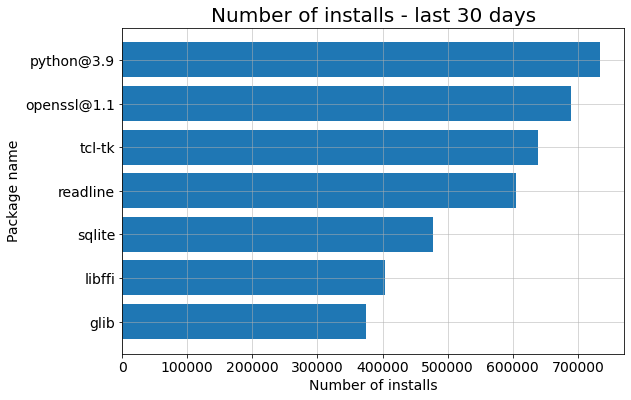

In [ ]:
df_most_last_30d.sort_values(by="installs last 30 days",ascending=True,inplace=True)
plot_bar(df_most_last_30d["package name"],df_most_last_30d["installs last 30 days"],"Number of installs - last 30 days",
"Number of installs")

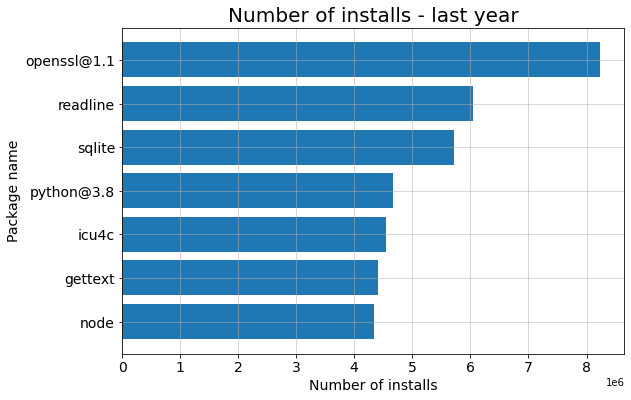

In [ ]:
df_most_last_year.sort_values(by="installs last year",ascending=True,inplace=True)
plot_bar(df_most_last_year["package name"],df_most_last_year["installs last year"],"Number of installs - last year",
"Number of installs")

*Considering only most downloaded packages last month


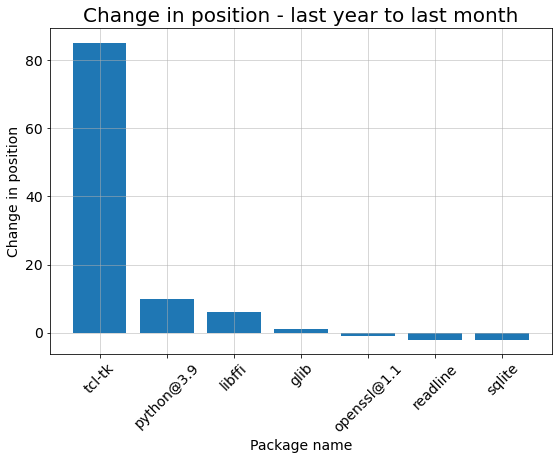

In [ ]:
print("*Considering only most downloaded packages last month")
plot_bar(major_changes["package name"],major_changes["change in position"],
         "Change in position - last year to last month","Change in position",isBarh=False)

*Considering only most downloaded packages last month


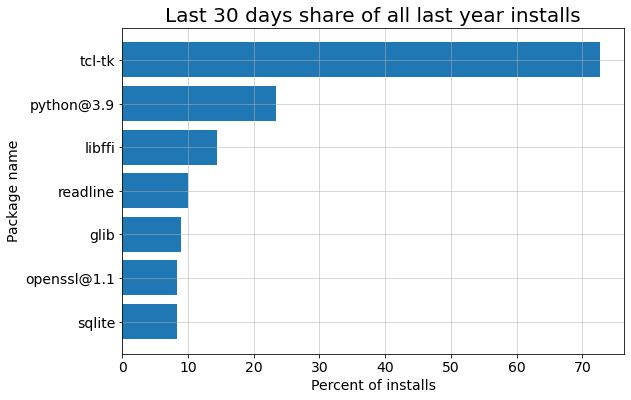

In [ ]:
print("*Considering only most downloaded packages last month")
df_largest_proportions.sort_values(by="last 30 days/last year",ascending=True,inplace=True)
plot_bar(df_largest_proportions["package name"],df_largest_proportions["last 30 days/last year"],
         "Last 30 days share of all last year installs","Percent of installs")